In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lib.dataset_utils import *
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
train_df, val_df, test_df = load_dataset(DatasetEnum.GoEmotions)

In [3]:
train_df.head(20)

,text,emotions
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2
3,To make her feel threatened,14
4,Dirty Southern Wankers,3
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,26
6,Yes I heard abt the f bombs! That has to be wh...,15
7,We need more boards and to create a bit more s...,"8,20"
8,Damn youtube and outrage drama is super lucrat...,0
9,It might be linked to the trust factor of your...,27


In [4]:
train_df.isna().sum()

text        0
emotions    0
dtype: int64

In [5]:
# find reddit user tags in the text
occ = train_df['text'].str.findall(r"(?: ^|\b)/?u\/\w+")
occ = [item for sublist in occ for item in sublist]
occ = pd.Series(occ)
occ.unique()

array(['u/iBiteYou', 'u/The_White_Baron', 'u/Dr', 'u/Reijka92',
       'u/HAHAAN00B', 'u/___apollo', 'u/Utkar22', 'u/tippr',
       'u/closeteverything69', 'u/Youareapooptard', 'u/Lebronlover23',
       'u/bookluvr83', 'u/Nerdinater', 'u/backwoodmenace', 'u/Mickster19',
       'u/ianamolly', 'u/chabanais', 'u/justforyouthlogic',
       'u/JusticeForShangeIa', 'u/krazyM', 'u/stumblinbear',
       'u/TheQTVain', 'u/SchnoodleDoodleDo', 'u/cumosaurusgaysex',
       'u/lilhan2', 'u/FappingPedant', 'u/back2worksoon', 'u/flight2',
       'u/Sippinthatminttea', 'u/dances', 'u/keypuncher', 'u/ibiteyou',
       'u/jellyjellyspace', 'u/beelzebambi', 'u/955bsp', 'u/hellseashell',
       'u/fart', 'u/lola_birds', 'u/skyboundIan', 'u/GarbagePailGrrrl',
       'u/DanVsStu', 'u/workingwa', 'u/JannisT', 'u/FThumb',
       'u/EightRoundsRapid', 'u/SamuelZeign', 'u/Goyteamsix',
       'u/Jakurton', 'u/MeatheadVernacular', 'u/CareeningDirigibug',
       'u/sixstringersoldier', 'u/77096', 'u/RedOnTheRail',

In [6]:
# find subreddit tags in the text
occ = train_df['text'].str.findall(r"(?: ^|\b)/?r\/\w+")
occ = [item for sublist in occ for item in sublist]
occ = pd.Series(occ)
occ.unique()

array(['r/NewTubers', 'r/hockey', 'r/trees', 'r/Judiasm', 'r/trollGC',
       'r/goodnewsforwomen', 'r/movies', 'r/Tekken', 'r/cringe', 'r/uk',
       'r/Minnesota', 'r/fireemblem', 'r/ATAAE', 'r/comedyheaven',
       'r/tworedditorsonecup', 'r/bitcoin', 'r/Bitcoin',
       'r/foursentencehorror', 'r/2healthbars', 'r/pcmasterrace',
       'r/jokes', 'r/thathappened', 'r/HelperBot_', 'r/fellowkids',
       'r/dankmemes', 'r/sarcasm', 'r/childfree', 'r/TrueReddit',
       'r/BravoRealHousewives', 'r/spacedicks', 'r/BreadTube',
       'r/LazyMan', 'r/politics', 'r/imatotalpieceofshit',
       'r/ComedyCemetery', 'r/punpatrol', 'r/The_Donald',
       'r/momforaminute', 'r/Polygrumps', 'r/showerthoughts',
       'r/uplifting', 'r/bestof', 'r/browns', 'r/sardonicast', 'r/ATBGE',
       'r/texas', 'r/medicine', 'r/maliciouscompliance',
       'r/MurderedByWords', 'r/MLS', 'r/woooosh', 'r/pragerurine',
       'r/falcons', 'r/titlegore', 'r/nextfuckinglevel', 'r/nbastreams',
       'r/braincels

In [7]:
train_df[train_df['text'].str.contains(r"(?: ^|\b)/?r\/\w+", regex=True)]

,text,emotions
206,Ask over at r/NewTubers,27
300,r/hockey has no love for us! Just stay here wi...,27
415,second temple stood for 420 years r/trees /r/J...,27
567,Nooooo r/trollGC is for memes Check out r/good...,27
583,">""fun"" is what you say when you can't give an ...","1,27"
...,...,...
42618,This should be on r/Unexpected oh wait...,27
42802,just a peep from /r/leagueoflegends here with ...,27
43117,Thank the heavens RuneScape is coming at you a...,15
43316,it also can be found in r/redditsmuseumoffilth,4


In [8]:
# find links in the text
occ = train_df['text'].str.findall(r"(?: ^|\b)https?://\S+")
occ = [item for sublist in occ for item in sublist]
occ = pd.Series(occ)
occ.unique()
print(occ)
occ = train_df['text'].str.findall(r'www\.[a-z]?\.?(com)+|[a-z]+\.(com)')
occ = [item for sublist in occ for item in sublist]
occ = pd.Series(occ)
occ.unique()
print(occ)

Series([], dtype: object)
Series([], dtype: object)


In [9]:
label_encodings = []
binarizers = []
# get label encoding
for name, dataset in zip(['train', 'val', 'test'], [train_df, val_df, test_df]):
    labels_df = dataset['emotions'].apply(lambda x: x.split(','))
    mlb = MultiLabelBinarizer()
    labels_df = mlb.fit_transform(labels_df)
    label_encodings.append(labels_df)
    binarizers.append(mlb)

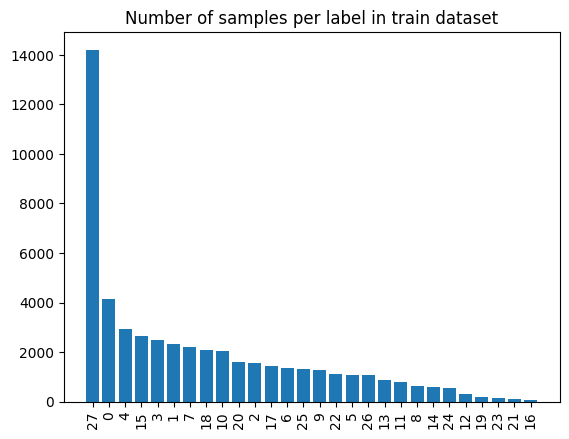

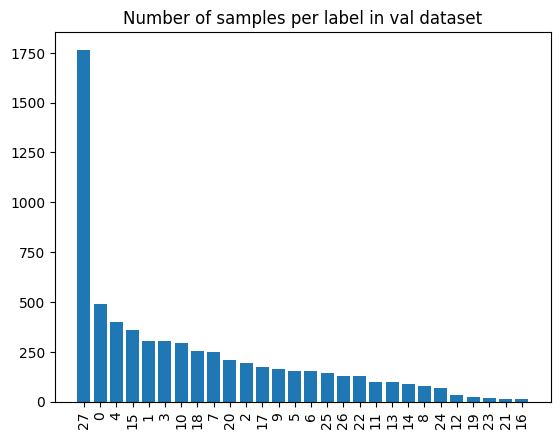

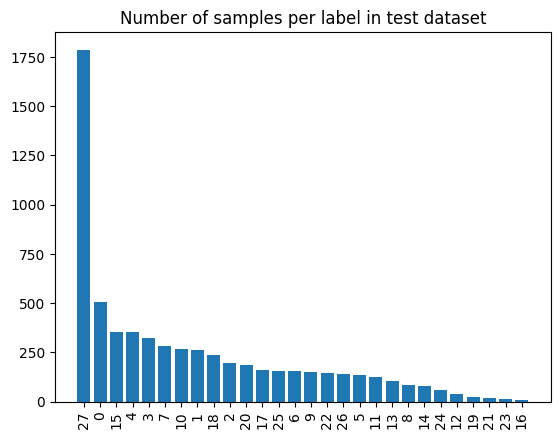

In [10]:
for name, dataset_labels, encoder in zip(['train', 'val', 'test'], label_encodings, binarizers):
    # bar plot of the number of samples per label
    label_names = encoder.classes_
    counts = np.sum(dataset_labels, axis=0)
    # sort by counts
    sorted_idx = np.argsort(counts)[::-1]
    label_names = label_names[sorted_idx]
    counts = counts[sorted_idx]
    plt.bar(label_names, counts)
    plt.xticks(rotation=90)
    plt.title(f'Number of samples per label in {name} dataset')
    plt.show()

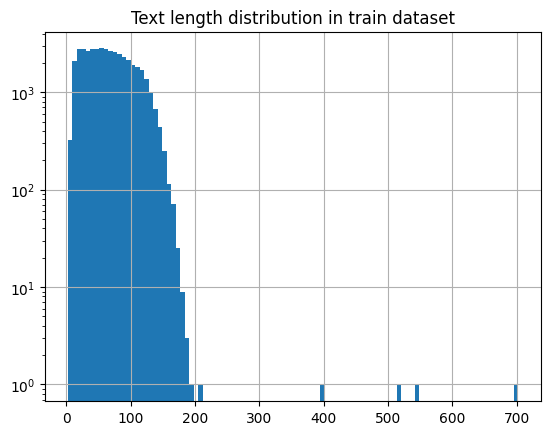

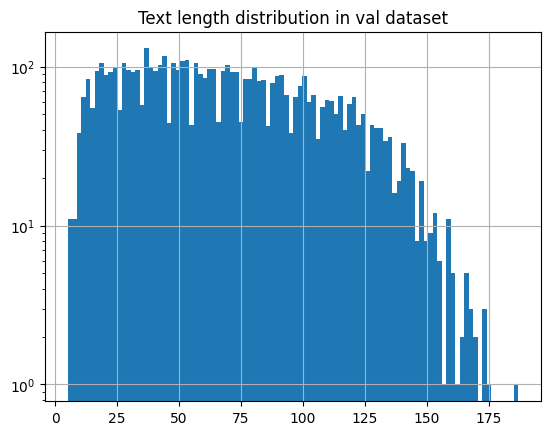

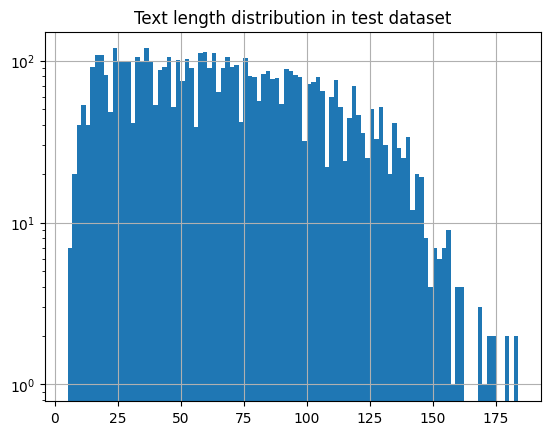

In [16]:
# text length histogram
for name, dataset in zip(['train', 'val', 'test'], [train_df, val_df, test_df]):
    dataset['text_len'] = dataset['text'].apply(lambda x: len(x))
    dataset['text_len'].hist(bins=100)
    plt.title(f'Text length distribution in {name} dataset')
    #log
    plt.yscale('log')
    plt.show()

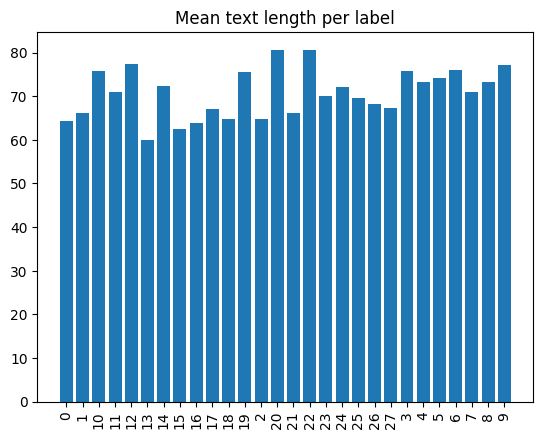

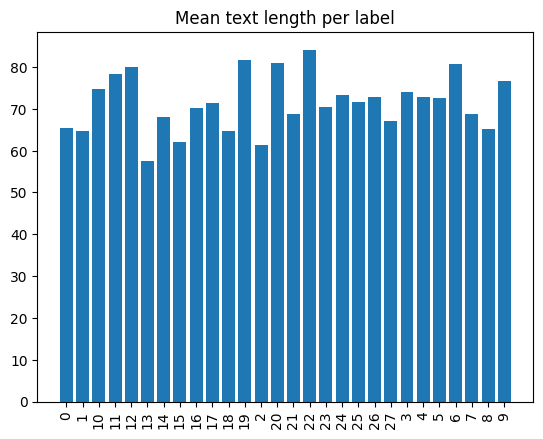

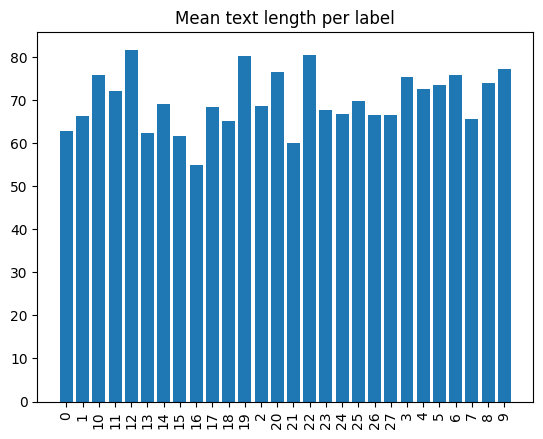

In [15]:
# mean text length per label
for name, labels_df, mlb, dataset in zip(['train', 'val', 'test'], label_encodings, binarizers, [train_df, val_df, test_df]):
    avg_text_len = []
    for label_idx, label in enumerate(mlb.classes_):
        label_mask = labels_df[:, label_idx] == 1
        label_text_len = dataset[label_mask]['text_len']
        avg_text_len.append(np.mean(label_text_len))
    plt.bar(mlb.classes_, avg_text_len)
    plt.xticks(rotation=90)
    plt.title('Mean text length per label')
    plt.show()

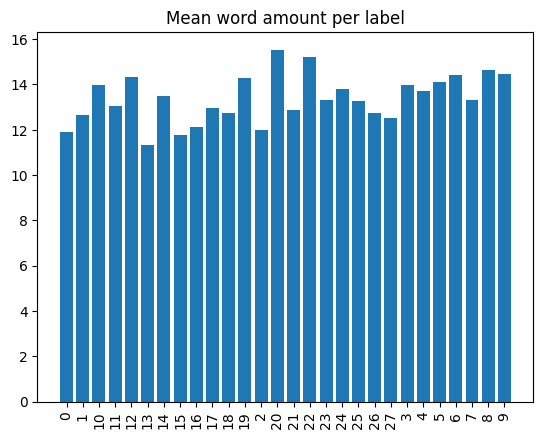

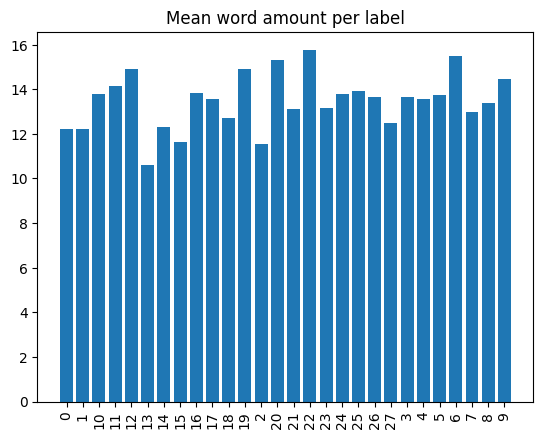

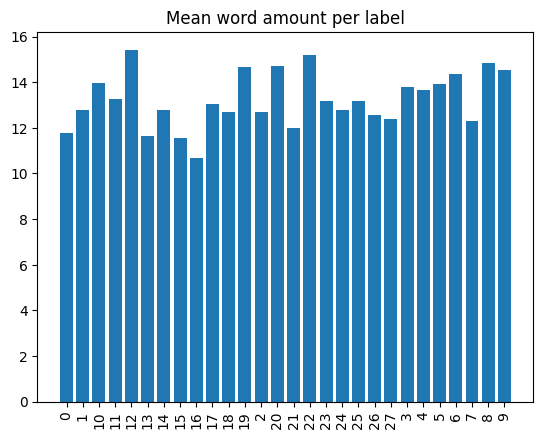

In [17]:
# average word amounts per label
for name, labels_df, mlb, dataset in zip(['train', 'val', 'test'], label_encodings, binarizers, [train_df, val_df, test_df]):
    avg_word_amount = []
    for label_idx, label in enumerate(mlb.classes_):
        label_mask = labels_df[:, label_idx] == 1
        label_word_amount = dataset[label_mask]['text'].apply(lambda x: len(x.split()))
        avg_word_amount.append(np.mean(label_word_amount))
    plt.bar(mlb.classes_, avg_word_amount)
    plt.xticks(rotation=90)
    plt.title('Mean word amount per label')
    plt.show()

## TODO
- seaborn colori
- mapping label